Use these counts to answer research question:
Is there a difference in clausal comlexity for simplified and authentic wikipedia articles
Share code, visualizations, and statistical results
Be prepared to talk through them

In [1]:
import spacy

# Import the displacy module from spaCy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change directory
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/DS_5780_spring_25") #change directory

#list files in that folder
os.listdir()

['reading_600_texts_metadata_only.csv',
 'reading_600_texts.csv',
 'all_excerpts',
 '__MACOSX',
 '.ipynb_checkpoints',
 'reading_data_surface_level_features.csv',
 'processed_reading_data.csv',
 'text_cleaning',
 'word_properties',
 'sentiment',
 'writing_data_w_meta_data.csv',
 'writing_data_w_meta_data_prompt_1.csv',
 'All_essays']

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Index(['id', 'text', 'bt_readability', 'Source', 'Topic', 'Text type',
       'Domain', ' '],
      dtype='object')
    num_complements                                   len_complements        \
              count mean std  min  25%  50%  75%  max           count  mean   
id                                                                            
1               1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0             1.0   5.0   
2               1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0             1.0  26.0   
3               1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0             1.0   0.0   
4               1.0  6.0 NaN  6.0  6.0  6.0  6.0  6.0             1.0  52.0   
5               1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0             1.0  39.0   
..              ...  ...  ..  ...  ...  ...  ...  ...             ...   ...   
596             1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0             1.0  21.0   
597             1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0             1.0  24.0   
598            

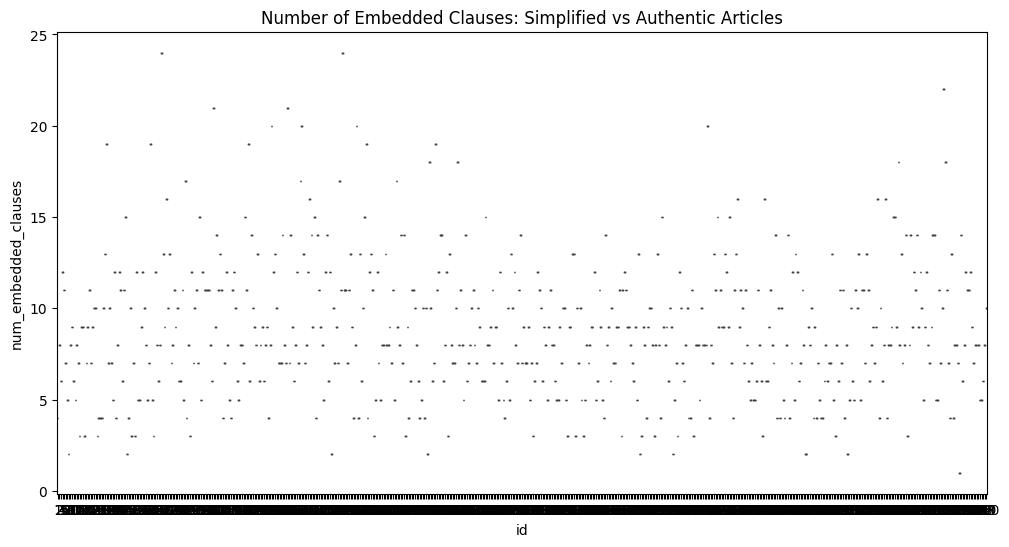

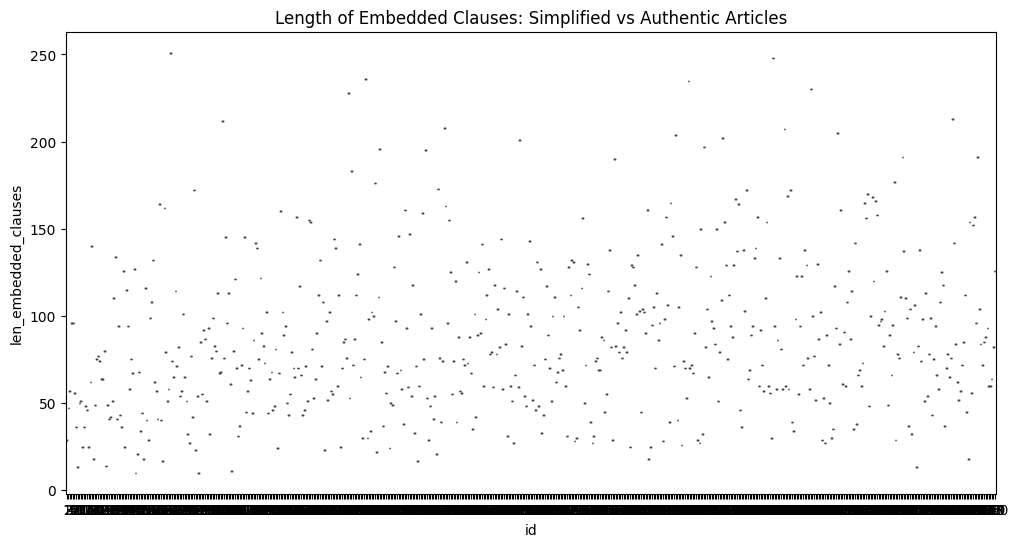

In [9]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the dataset
file_path = "reading_600_texts.csv"  # Change the file path if necessary
df = pd.read_csv(file_path, encoding="ISO-8859-1")

print(df.columns)

num_complements = []
len_complements = []
num_modifiers_subjects = []
len_modifiers_subjects = []
num_embedded_clauses = []
len_embedded_clauses = []

# Function to count and compute clause lengths
def analyze_clausal_complexity(doc):
    num_comp = 0
    len_comp = 0
    num_mod_subj = 0
    len_mod_subj = 0

    for token in doc:
        if token.dep_ in ["ccomp", "xcomp", "pcomp"]:  # Complements
            num_comp += 1
            len_comp += len(list(token.subtree))
        if token.dep_ in ["relcl", "acl", "advcl", "csubj", "csubjpass"]:  # Clausal modifiers & subjects
            num_mod_subj += 1
            len_mod_subj += len(list(token.subtree))

    # Total embedded clauses and their length
    total_clauses = num_comp + num_mod_subj
    total_length = len_comp + len_mod_subj

    return num_comp, len_comp, num_mod_subj, len_mod_subj, total_clauses, total_length

# Process each article text
for text in df["text"]:
    doc = nlp(text)
    results = analyze_clausal_complexity(doc)

    num_complements.append(results[0])
    len_complements.append(results[1])
    num_modifiers_subjects.append(results[2])
    len_modifiers_subjects.append(results[3])
    num_embedded_clauses.append(results[4])
    len_embedded_clauses.append(results[5])

# Add results to DataFrame
df["num_complements"] = num_complements
df["len_complements"] = len_complements
df["num_modifiers_subjects"] = num_modifiers_subjects
df["len_modifiers_subjects"] = len_modifiers_subjects
df["num_embedded_clauses"] = num_embedded_clauses
df["len_embedded_clauses"] = len_embedded_clauses

# Display summary statistics
print(df.groupby("id")[["num_complements", "len_complements",
                          "num_modifiers_subjects", "len_modifiers_subjects",
                          "num_embedded_clauses", "len_embedded_clauses"]].describe())

# Statistical Analysis: Compare simplified vs authentic articles
simplified = df[df["id"] == "simplified"]
authentic = df[df["id"] == "authentic"]

# Perform t-tests for each metric
metrics = ["num_complements", "len_complements",
           "num_modifiers_subjects", "len_modifiers_subjects",
           "num_embedded_clauses", "len_embedded_clauses"]

for metric in metrics:
    t_stat, p_value = ttest_ind(simplified[metric], authentic[metric], equal_var=False)
    print(f"T-test for {metric}: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

# Visualization: Compare simplified vs authentic articles
plt.figure(figsize=(12, 6))
sns.boxplot(x="id", y="num_embedded_clauses", data=df)
plt.title("Number of Embedded Clauses: Simplified vs Authentic Articles")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="id", y="len_embedded_clauses", data=df)
plt.title("Length of Embedded Clauses: Simplified vs Authentic Articles")
plt.show()
